## Applications with Transfer Learning and Deep Embeddings - [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

**ImageNet** 
 - Dataset has ten million labelled images
 - is an yearly competition called ImageNet Large Scale Visual Recognition Challenge (ILSVRC)
 - ImageNet has driven a lot of innovations through the years
    - Pre-2012, various pre-CNN approaches
    - 2012, AlexNet - first CNN architecture winner
    - 2014, VGG - first very deep architecture, skip-connections
    - 2015, GoogleNet - pioneered inception module 
    - 2016 + 2017, ensemble models

 **Why use pre-trained embeddings ?**
 - state of the art deep learning models are computationally prohibitive to train.
 - Many times may take weeks to train on large GPU farms.
 - THese pre-trained models can be used for other tasks.
 - Learned embeddings + filters are general & useful feature extractors.

 **Why use Pre-trained Embeddings for Image Search Engine ?**
 - Semantically similar images produce similar embeddings.
 - Can process a new image to find similar images in database using pre-trained embeddings.

**Here we are going to** 
- Load pre-trained VGG Net(ImageNet pre-trained CNN)
- Retrieve VGG image embeddings for a new dataset
- Query for similar images using embeddings (Build an image retrieval system using embeddings)



*The CIFAR-10 dataset is much smaller than ImageNet dataset, it consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.*

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import cifar10

import os, glob
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False) # top denotes the classifier by not 
#including top we are just left with the embeddings

58900480/58889256 [==============================] - 170s 3us/step


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [9]:
img_path = 'data/cat.png'
img = image.load_img(img_path, target_size=(32, 32, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x).flatten()

In [10]:
# print(features)
print(features.shape)

(512,)


In [11]:
# load the cifar dataset
(X_train, _), (X_test, _) = cifar10.load_data()
cifar_images = np.concatenate((X_train, X_test), axis=0)
print(len(cifar_images))

170508288/170498071 [==============================] - 67s 0us/step
60000


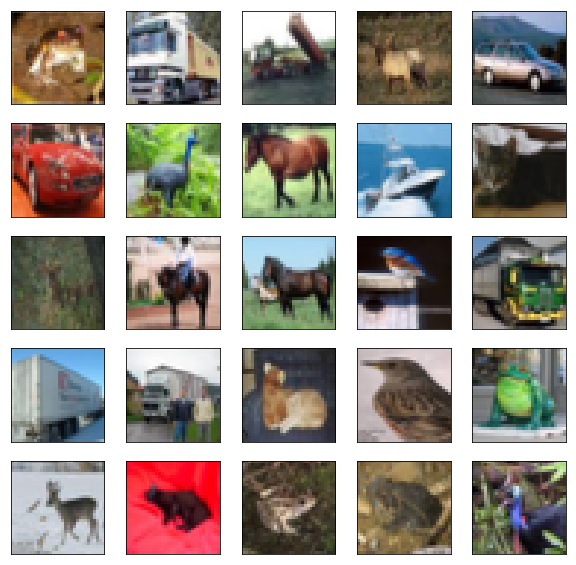

In [12]:
fig = plt.figure(figsize=(10,10))

for i in range(0,25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(cifar_images[i,:].reshape(32, 32, 3))

plt.show()

In [13]:
# get features for all of CIFAR-10
features_list = []
for image_index in tqdm(range(len(cifar_images))):
    cifar_image = cifar_images[image_index,...]
    x = image.img_to_array(cifar_image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x).flatten()
    features_list.append(features)

100%|██████████| 60000/60000 [6:07:38<00:00,  3.56it/s]      


In [14]:
# print(features_list[1])
features_array = np.array(features_list)
print(features_array.shape)
nearest_neighbor_model = NearestNeighbors(10) # sklearn's KNN provides a fast way to loookup
nearest_neighbor_model.fit(features_array)

(60000, 512)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=10, p=2, radius=1.0)

In [18]:
def get_similiar_images(img_path, cnn_model, knn_model, image_dataset):
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = cnn_model.predict(x).flatten()
    distances, indices = knn_model.kneighbors([features])
    similiar_images = []
    for s_i in indices[0]:
        print(s_i)
        similiar_images.append(image_dataset[s_i])
    return similiar_images

def plot_similiar_images(query_path, images):
    fig = plt.figure(figsize=(1, 1))
    query_image = image.load_img(img_path, target_size=(32, 32))
    plt.title("QUERY IMAGE")
    plt.imshow(query_image)
    fig = plt.figure(figsize=(3,3))
    plt.title("Similiar Images")
    for i in range(0, 9):
        sim_image = images[i]
        ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
        ax.imshow(sim_image)

    plt.show()


30122
1027
11101
17952
20432
36462
3376
23373
5898
22066


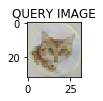

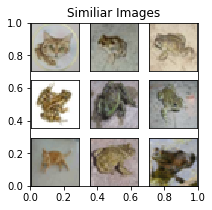

In [16]:
img_path = 'data/cat.png'
similiar_images = get_similiar_images(img_path, model, nearest_neighbor_model, cifar_images)
plot_similiar_images(img_path, similiar_images)

41690
9106
22490
26350
51412
13711
42127
26790
38820
20933


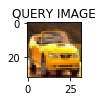

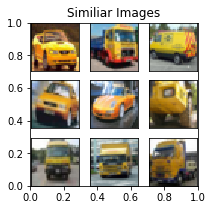

In [17]:
img_path = 'data/bus.png'
similiar_images = get_similiar_images(img_path, model, nearest_neighbor_model, cifar_images)
plot_similiar_images(img_path, similiar_images)